In [1]:
import numpy as np
import pandas as pd


dfs = []
for i in range(1,5):
    path = 'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)

# This csv file contains names of all the features
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
data.columns = df_col['Name']
dataSet = data
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [3]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 43 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport have 129124 value : ['1390' '33661' '1464' ... 533 933 706]
dstip have 47 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.

In [4]:
# Select only categorical columns
categorical_columns = dataSet.select_dtypes(include=['object']).columns
# Initialize an empty dictionary to store results
result_dict = {}

# Iterate through each categorical column
for column in categorical_columns:
    # Calculate value counts
    value_counts = dataSet[column].value_counts()

    # Calculate percentages
    percentages = (value_counts / len(dataSet[column])) * 100

    # Combine counts and percentages into a DataFrame
    result_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })

    # Store the result in the dictionary
    result_dict[column] = result_df

# Print the results
for column, result_df in result_dict.items():
    print(f"Column: {column}")
    print(result_df)
    print()

Column: srcip
                  Count  Percentage
srcip                              
59.166.0.4       197959    7.793517
59.166.0.1       197680    7.782533
59.166.0.5       197626    7.780407
59.166.0.2       197550    7.777415
59.166.0.0       197528    7.776549
59.166.0.3       195953    7.714542
59.166.0.9       190187    7.487539
59.166.0.6       189419    7.457303
59.166.0.8       189341    7.454232
59.166.0.7       189059    7.443130
175.45.176.1     127998    5.039198
175.45.176.3     118673    4.672079
175.45.176.0      82999    3.267617
149.171.126.18    81680    3.215689
149.171.126.15    44883    1.767015
149.171.126.14    41047    1.615994
175.45.176.2      32026    1.260843
149.171.126.10    30365    1.195450
149.171.126.12    16082    0.633138
10.40.85.1         4018    0.158186
10.40.182.1        3984    0.156847
10.40.182.6        3492    0.137478
10.40.85.30        2138    0.084172
10.40.182.3        2105    0.082872
10.40.170.2        2094    0.082439
10.40.85.10   

In [5]:
dataSet['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [6]:
dataSet['attack_cat'] = dataSet.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
dataSet['attack_cat'] = dataSet['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
dataSet['attack_cat'].unique()


array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [7]:
# Replace '-' with 'unknown'
dataSet['service'] = dataSet['service'].replace('-', 'unknown')

#convert string numbers ('0') to numeric (0) and Replace empty strings with NaN

In [8]:

# Remove leading and trailing whitespaces
dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].astype(str).str.strip()

# Replace empty strings with NaN
dataSet['ct_ftp_cmd'].replace('', np.nan, inplace=True)

# Convert the column to numeric type
dataSet['ct_ftp_cmd'] = pd.to_numeric(dataSet['ct_ftp_cmd'], errors='coerce')


/tmp/ipython-input-15592487.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataSet['ct_ftp_cmd'].replace('', np.nan, inplace=True)


In [9]:
dataSet['ct_ftp_cmd'].unique()

array([ 0.,  1.,  6.,  2.,  4.,  8.,  5.,  3., nan])

##Handling Missing Values: Filling Numerical Columns with Median and Categorical Columns with Mode

In [10]:
numerical_col = dataSet.select_dtypes(include=np.number).columns  # All the numerical columns list
categorical_col = dataSet.select_dtypes(exclude=np.number).columns  # All the categorical columns list

# Calculate the median and replace null values

for col in dataSet.columns:
    if dataSet[col].dtypes == 'object' :
        val = dataSet[col].mode().values[0]  # Mode value of the column in train data
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    else:
        val = dataSet[col].median()
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    print(col,val)

srcip 59.166.0.4
sport 1043
dstip 149.171.126.3
dsport 53
proto tcp
state FIN
dur 0.015861
sbytes 1470.0
dbytes 1820.0
sttl 31.0
dttl 29.0
sloss 3.0
dloss 4.0
service unknown
sload 589303.75
dload 589317.875
spkts 12.0
dpkts 12.0
swin 255.0
dwin 255.0
stcpb 639725026.0
dtcpb 638417164.0
smeansz 73.0
dmeansz 89.0
trans_depth 0.0
res_bdy_len 0.0
sjit 19.124899
djit 2.653561
stime 1424226977.0
ltime 1424226978.0
sintpkt 0.468262
dintpkt 0.414755
tcprtt 0.000613
synack 0.000483
ackdat 0.000122
is_sm_ips_ports 0.0
ct_state_ttl 0.0
ct_flw_http_mthd 0.0
is_ftp_login 0.0
ct_ftp_cmd 0.0
ct_srv_src 5.0
ct_srv_dst 5.0
ct_dst_ltm 3.0
ct_src_ltm 4.0
ct_src_dport_ltm 1.0
ct_dst_sport_ltm 1.0
ct_dst_src_ltm 2.0
attack_cat normal
label 0.0


In [11]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 43 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport have 129124 value : ['1390' '33661' '1464' ... 533 933 706]
dstip have 47 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.

In [12]:
dataSet.drop(['label','stime','ltime'], axis=1, inplace=True)

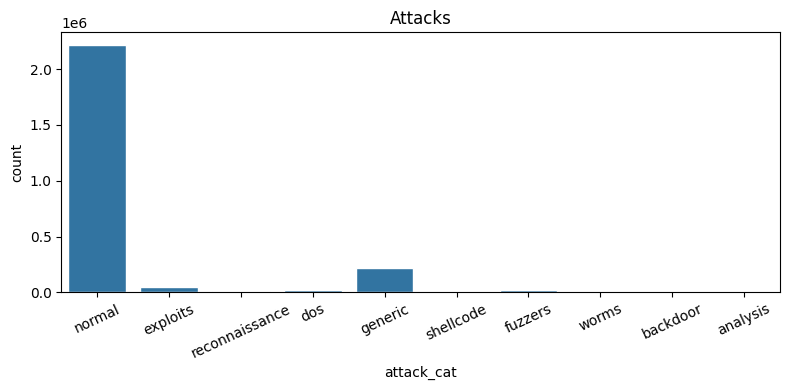

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
    # countplot of the given column
ax = sns.countplot(x='attack_cat',  data=dataSet)
ax.set_title("Attacks")
plt.xticks(rotation=25)
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNSWNB15_Attacks.png', dpi=300, format='png')
plt.show()

In [14]:
dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':1, 'backdoor':1, 'exploits':1,
       'analysis':1, 'fuzzers':1, 'worms':1, 'shellcode':1, 'generic':1},inplace = True)
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

/tmp/ipython-input-1735329913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':1, 'backdoor':1, 'exploits':1,
/tmp/ipython-input-1735329913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataSet['attack_cat'].replace({ '

Feature 'srcip' has 43 categories
Feature 'sport' has 129124 categories
Feature 'dstip' has 47 categories
Feature 'dsport' has 64630 categories
Feature 'proto' has 135 categories
Feature 'state' has 16 categories
Feature 'service' has 13 categories


In [15]:
# Select columns with data type 'object'
object_columns = dataSet.select_dtypes(include=['object'])

# Print or use the selected columns as needed
print(object_columns)

Name            srcip  sport           dstip dsport proto state   service
0          59.166.0.0   1390   149.171.126.6     53   udp   CON       dns
1          59.166.0.0  33661   149.171.126.9   1024   udp   CON   unknown
2          59.166.0.6   1464   149.171.126.7     53   udp   CON       dns
3          59.166.0.5   3593   149.171.126.5     53   udp   CON       dns
4          59.166.0.3  49664   149.171.126.0     53   udp   CON       dns
...               ...    ...             ...    ...   ...   ...       ...
2540042    59.166.0.5  33094   149.171.126.7  43433   tcp   FIN  ftp-data
2540043    59.166.0.7  20848   149.171.126.4     21   tcp   CON       ftp
2540044    59.166.0.3  21511   149.171.126.9     21   tcp   CON       ftp
2540045    59.166.0.9  35433   149.171.126.0     80   tcp   CON      http
2540046  175.45.176.0  17293  149.171.126.17    110   tcp   CON      pop3

[2540047 rows x 7 columns]


In [16]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['srcip','sport','dstip','dsport','proto','service','state']
for f in features:
    dataSet[f] = dataSet[f].astype(str)
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f])


# One-hot encode categorical variables
#dataSet = pd.get_dummies(dataSet, columns=['state'])
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,0.0,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,0.0,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,0.0,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,0.0,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,0.0,7,9,1,1,1,1,1,0


In [17]:
dataSet.head(100)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,0.0,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,0.0,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,0.0,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,0.0,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,0.0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30,37252,13,62606,114,5,0.244832,876,9446,62,...,0.0,0.0,3,1,1,1,1,1,1,1
96,39,38992,9,47344,120,2,0.001069,130,162,31,...,0.0,0.0,12,8,2,2,2,1,1,0
97,35,32053,9,42243,120,2,0.001793,520,304,31,...,0.0,0.0,5,3,2,1,1,1,1,0
98,39,36514,23,47344,120,2,0.001112,146,178,31,...,0.0,0.0,12,9,1,2,2,1,1,0


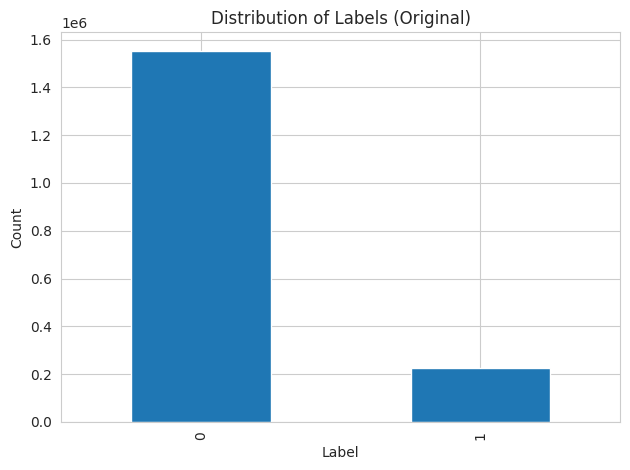

attack_cat
0    1553134
1     224898
Name: count, dtype: int64


In [18]:
# Divide columns into features and labels
x = dataSet.iloc[:, 0:45]   # Columns 0 to 44
y = dataSet.iloc[:, 45]     # Column 45 is the classification

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    train_size=0.7,
    random_state=88,
    shuffle=True,
    stratify=y
)



# Distribution of values ​​in y_train
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Original)')
plt.tight_layout()
plt.savefig('UNBALANCED.png', dpi=300, format='png')
plt.show()

print(y_train.value_counts())



In [19]:
#
x_normal = x_train[y_train == 0]


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0     0.9881    0.9492    0.9683    665630
           1     0.7242    0.9209    0.8108     96385

    accuracy                         0.9456    762015
   macro avg     0.8562    0.9351    0.8895    762015
weighted avg     0.9547    0.9456    0.9483    762015



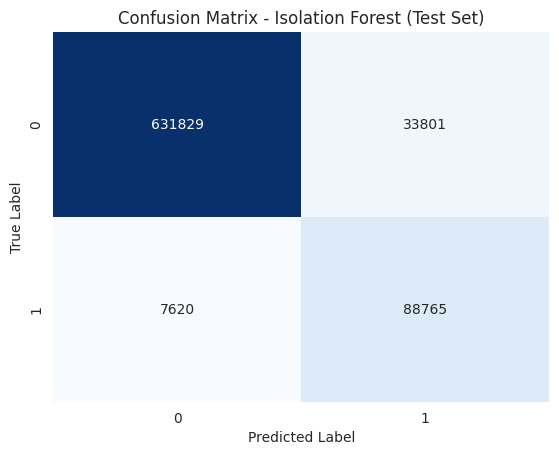

In [29]:

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)

# 1. Train Isolation Forest with best parameters
# ======================================
IF = IsolationForest(
    n_estimators=100,
    max_samples=1.0,
    contamination=0.05,
    max_features=1.0,
    bootstrap=False,
    random_state=88
)

# Train the model on normal data only
IF.fit(x_normal)

# ======================================
# 2. Predict on train and test sets
# ======================================
y_if_train = IF.predict(x_train)
y_if_hold = IF.predict(x_test)

# Convert predictions from {-1, 1} to {1, 0} format
# (-1 → anomaly → 1), (1 → normal → 0)
y_if_train = np.where(y_if_train == -1, 1, 0)
y_if_hold = np.where(y_if_hold == -1, 1, 0)

# ======================================
# 3. Decision function values
# ======================================
decision_function_train = IF.decision_function(x_train)
decision_function_test = IF.decision_function(x_test)

# ======================================
# 4. Evaluation metrics
# ======================================
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_if_hold, digits=4))

# ======================================
# 5. Confusion matrix
# ======================================
cm = confusion_matrix(y_test, y_if_hold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Isolation Forest (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [21]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import IsolationForest

#
# 1. Train Isolation Forest model
# ======================================
IF = IsolationForest(
    n_estimators=200,
    max_samples=1.0,
    contamination='auto',
    max_features=1.0,
    bootstrap=False,
    random_state=88
)

# Train only on normal data
IF.fit(x_normal)


# Compute decision function for train and test sets
# ======================================
decision_train = IF.decision_function(x_train)
decision_test = IF.decision_function(x_test)


#  Use the best threshold found earlier
# ======================================
threshold = 0.0647

# Points below threshold are anomalies (1), others are normal (0)
y_pred_test = np.where(decision_test < threshold, 1, 0)


#  Print classification report
# ======================================
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test, digits=4))


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0     0.9778    0.9789    0.9784    665630
           1     0.8532    0.8466    0.8499     96385

    accuracy                         0.9622    762015
   macro avg     0.9155    0.9127    0.9141    762015
weighted avg     0.9620    0.9622    0.9621    762015



In [24]:
from sklearn.metrics import f1_score
import numpy as np
from sklearn.ensemble import IsolationForest

#
IF = IsolationForest(
    n_estimators=200,
    max_samples=1.0,
    contamination='auto',
    max_features=1.0,
    bootstrap=False,
    random_state=88
)


IF.fit(x_normal)


decision_train = IF.decision_function(x_train)
decision_test = IF.decision_function(x_test)

#
thresholds = np.linspace(min(decision_test), max(decision_test), 50)

best_threshold = None
best_f1 = 0

for thresh in thresholds:
    y_pred_test = np.where(decision_test < thresh, 1, 0)
    f1 = f1_score(y_test, y_pred_test)
    print(f"Threshold={thresh:.4f}, F1-score={f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"\nBest Threshold: {best_threshold:.4f}, Best F1-score: {best_f1:.4f}")


Threshold=-0.2687, F1-score=0.0000
Threshold=-0.2597, F1-score=0.0001
Threshold=-0.2507, F1-score=0.0001
Threshold=-0.2417, F1-score=0.0003
Threshold=-0.2327, F1-score=0.0003
Threshold=-0.2237, F1-score=0.0004
Threshold=-0.2147, F1-score=0.0008
Threshold=-0.2057, F1-score=0.0011
Threshold=-0.1966, F1-score=0.0012
Threshold=-0.1876, F1-score=0.0016
Threshold=-0.1786, F1-score=0.0019
Threshold=-0.1696, F1-score=0.0021
Threshold=-0.1606, F1-score=0.0023
Threshold=-0.1516, F1-score=0.0025
Threshold=-0.1426, F1-score=0.0039
Threshold=-0.1336, F1-score=0.0052
Threshold=-0.1246, F1-score=0.0073
Threshold=-0.1156, F1-score=0.0094
Threshold=-0.1065, F1-score=0.0121
Threshold=-0.0975, F1-score=0.0160
Threshold=-0.0885, F1-score=0.0234
Threshold=-0.0795, F1-score=0.0323
Threshold=-0.0705, F1-score=0.0503
Threshold=-0.0615, F1-score=0.0961
Threshold=-0.0525, F1-score=0.1653
Threshold=-0.0435, F1-score=0.2515
Threshold=-0.0345, F1-score=0.3305
Threshold=-0.0254, F1-score=0.4942
Threshold=-0.0164, F